In [1]:
import pandas as pd
import datetime
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
with open('stock_info.json', 'r') as f:
    data = json.load(f)

In [3]:
stocks = [ stock for stock in data.keys()]

#### Next Day Max/Min Value  (% Difference from Closing Price)

In [4]:
start = datetime.datetime.now()
period = [1, 2]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_1'] = _low
        stock_dict_list[index]['Max_1'] = _max
    data[stock] = stock_dict_list

#### 3 Day Max/Min Value (% Difference from Closing Price)
The range is from the 2nd day to the 3rd after the input day

In [5]:
start = datetime.datetime.now()
period = [2, 4]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_3'] = _low
        stock_dict_list[index]['Max_3'] = _max
    data[stock] = stock_dict_list
            

#### 10 Day Max/Min Value (% Difference from Closing Price)
The range is from the 4th day to the 10th after the input day

In [6]:
start = datetime.datetime.now()
period = [4, 11]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_10'] = _low
        stock_dict_list[index]['Max_10'] = _max
    data[stock] = stock_dict_list
            

#### 30 Day Max/Min Value (% Difference from Closing Price)
The range is from the 11th day to the 30th after the input day

In [7]:
start = datetime.datetime.now()
period = [11, 31]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_30'] = _low
        stock_dict_list[index]['Max_30'] = _max
    data[stock] = stock_dict_list
            

#### Creating List of Dictionary to convert to a Dataframe 

In [8]:
data_in_list = []
for stock in stocks:
    stock_dict_list = data[stock]
    for index, dict_ in enumerate(stock_dict_list):
        dict_['Ticker'] = stock
        data_in_list.append(dict_)
df = pd.DataFrame(data_in_list)   
print(len(df))
df.head()

148088


,Adj Close,Close,Date,High,Low,Low_1,Low_10,Low_3,Low_30,Max_1,Max_10,Max_3,Max_30,Open,Ticker,Volume
0,15.000000,15.000000,2014-01-07 00:00:00,17.00,15.000000,0.000000,0.125000,0.068750,-0.012500,0.125000,0.250000,0.250000,0.250000,16.0,ITCI,59800.0
1,17.000000,17.000000,2014-01-08 00:00:00,18.00,16.000000,-0.022857,0.028571,0.000000,-0.097143,0.014286,0.142857,0.142857,0.142857,17.5,ITCI,51100.0
2,17.500000,17.500000,2014-01-09 00:00:00,17.75,17.100000,0.000000,0.028571,0.028571,-0.097143,0.142857,0.142857,0.100000,0.142857,17.5,ITCI,159900.0
3,18.000000,18.000000,2014-01-10 00:00:00,20.00,17.500000,0.040000,0.040571,0.028571,-0.097143,0.057143,0.142857,0.100000,0.142857,17.5,ITCI,157100.0
4,18.200001,18.200001,2014-01-13 00:00:00,18.50,18.200001,-0.021739,-0.002717,-0.021739,-0.141304,0.046196,0.086957,0.032609,0.086957,18.4,ITCI,5000.0


In [9]:
df.columns

Index(['Adj Close', 'Close', 'Date', 'High', 'Low', 'Low_1', 'Low_10', 'Low_3',
       'Low_30', 'Max_1', 'Max_10', 'Max_3', 'Max_30', 'Open', 'Ticker',
       'Volume'],
      dtype='object')

#### Check Null Values

In [9]:
df.isna().sum()

Adj Close       0
Close           0
Date            0
High            0
Low             0
Low_1         192
Low_10       1056
Low_3         384
Low_30       2976
Max_1         192
Max_10       1056
Max_3         384
Max_30       2976
Open            0
Ticker          0
Volume          0
dtype: int64

#### Remove Nulls

In [10]:
df = df.dropna()

In [11]:
df = df.reset_index(drop=True)

### Checking Distribution of the Targets

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


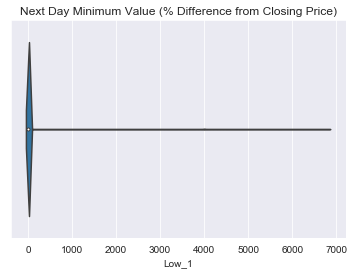

In [21]:
sns.violinplot(x='Low_1', data=df);
plt.title('Next Day Minimum Value (% Difference from Closing Price)');


In [19]:
df.Low_1.describe()


count    145112.000000
mean         14.692263
std         242.340622
min          -0.999869
25%          -0.056474
50%          -0.025339
75%           0.000000
max        6817.181855
Name: Low_1, dtype: float64

The low values were corragated between -5.6% and 0% with many extreme values to the negative and positive. This outcome is not expected because these type stock tend to be volatile, but 5.6% is a very large daily move.   

In [1]:

sns.violinplot(x='Max_1', data=df.loc[df.Max_1<1]);
plt.title('Next Day Max Value (% Difference from Closing Price)');

NameError: name 'sns' is not defined

In [24]:
df.Max_1.describe()


count    145112.000000
mean         14.836008
std         243.590855
min          -0.999847
25%           0.000000
50%           0.021502
75%           0.055118
max        6817.181855
Name: Max_1, dtype: float64

In [25]:
df.Low_1.loc[df.Low_1 < -0.025].count()/len(df), df.Max_1.loc[df.Low_1 > 0.025].count()/len(df)

(0.5033629196758366, 0.09641518275538895)

The max values seem to be the mirror opposite of the lows  and were corragated between 0% and 5.5% with many extreme values to the negative and positive. Again 5.5% is a very large daily move to be common.   

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


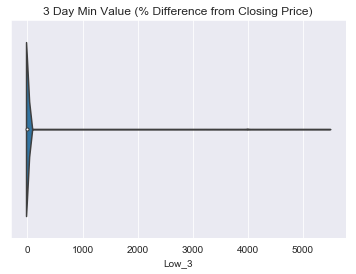

In [34]:


sns.violinplot(x='Low_3', data=df);
plt.title('3 Day Min Value (% Difference from Closing Price)');

In [35]:
df.Low_3.describe()


count    145112.000000
mean          4.141596
std         129.190681
min          -0.999899
25%          -0.080402
50%          -0.036620
75%           0.000000
max        5472.684279
Name: Low_3, dtype: float64

The low values seemed to have extended down with most values between -8.0% and 0% with many extreme values to the negative and positive.   

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


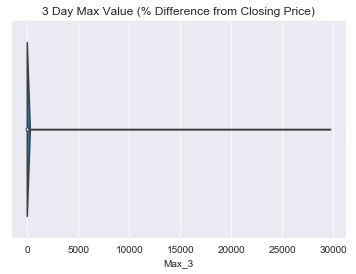

In [36]:

sns.violinplot(x='Max_3', data=df);
plt.title('3 Day Max Value (% Difference from Closing Price)');

In [37]:
df.Max_3.describe()


count    145112.000000
mean         25.711340
std         331.248295
min          -0.999875
25%           0.000000
50%           0.033126
75%           0.083650
max       29665.666409
Name: Max_3, dtype: float64

Again the max values seem to be the mirror opposite of the lows with values between 0% and 8.3% with many extreme values to the negative and positive. 

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


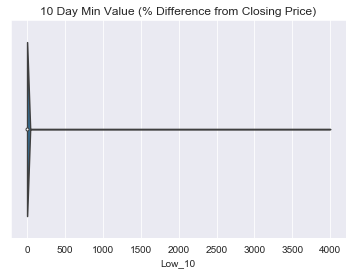

In [39]:

sns.violinplot(x='Low_10', data=df);
plt.title('10 Day Min Value (% Difference from Closing Price)');

In [40]:
df.Low_10.describe()


count    145112.000000
mean         -0.001565
std          18.183725
min          -0.999948
25%          -0.140955
50%          -0.070175
75%          -0.010855
max        3998.999810
Name: Low_10, dtype: float64

The low values extend some more with most values were between -14.0% and 1.1% with many extreme values to the negative and positive.   

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


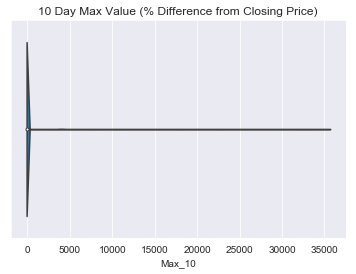

In [42]:
sns.violinplot(x='Max_10', data=df);
plt.title('10 Day Max Value (% Difference from Closing Price)');

In [43]:
df.Max_10.describe()


count    145112.000000
mean         49.039438
std         510.224834
min          -0.999833
25%           0.006447
50%           0.070940
75%           0.162879
max       35599.000796
Name: Max_10, dtype: float64

Again the max values seem to be the mirror opposite of the lows with values between 0.6% and 16.3% with many extreme values to the negative and positive. 

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


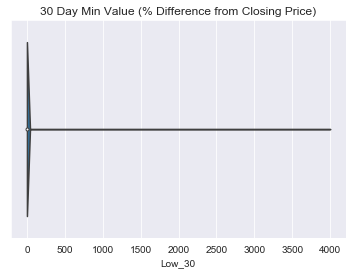

In [44]:
sns.violinplot(x='Low_30', data=df);
plt.title('30 Day Min Value (% Difference from Closing Price)');

In [45]:
df.Low_30.describe()


count    145112.000000
mean          0.087902
std          29.693474
min          -0.999972
25%          -0.237115
50%          -0.124480
75%          -0.021739
max        3998.999810
Name: Low_30, dtype: float64

The low values seemed to have extended down with most values between -8.0% and 0% with many extreme values to the negative and positive.   

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


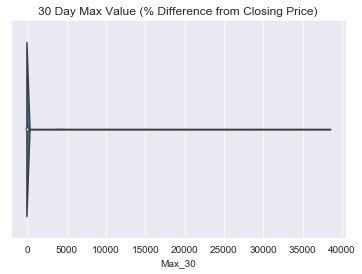

In [47]:

sns.violinplot(x='Max_30', data=df);
plt.title('30 Day Max Value (% Difference from Closing Price)');

In [48]:
df.Max_30.describe()


count    145112.000000
mean         60.329644
std         676.034567
min          -0.951601
25%           0.017699
50%           0.135773
75%           0.308447
max       38399.000858
Name: Max_30, dtype: float64

Again the max values seem to be the mirror opposite of the lows with values between 0% and 8.3% with many extreme values to the negative and positive. 

C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


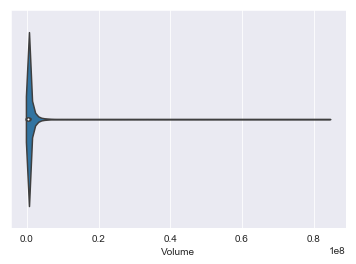

In [50]:
sns.violinplot(x='Volume', data=df);


In [51]:
 df.Volume.describe()

count    1.451120e+05
mean     5.244879e+05
std      1.366595e+06
min      0.000000e+00
25%      4.750000e+04
50%      2.034000e+05
75%      5.477000e+05
max      8.439200e+07
Name: Volume, dtype: float64

In [56]:
((df.High-df.Low)/ df.Low).describe()

count    145112.000000
mean          0.066330
std           0.079689
min           0.000000
25%           0.037037
50%           0.054094
75%           0.079365
max           9.000000
dtype: float64